# **The main objective of this notebook is to build a Convolutional Neural Network (CNN) using the UTKFace dataset to perform multi-class classification.**



Dataset Link:
*  https://huggingface.co/datasets/py97/UTKFace-Cropped?utm_source=chatgpt.com


I am going to use google collab for training of model, you can use own IDE for this model.

In [1]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.listdir("/content/drive/My Drive")

['DriveSharer',
 'Kolop',
 'GDToT',
 'WhatsApp Image 2024-12-20 at 22.40.37_fcdc2f8a.jpg',
 'Colab Notebooks',
 'WhatsApp Image 2025-02-08 at 20.49.09_02e7cb53.jpg',
 'Copy of VC_RedistInstaller.exe',
 'To-do list.gsheet',
 'Google sheets',
 'Untitled spreadsheet.gsheet',
 'changed data type(numeric) (2).xlsx',
 'changed data type(numeric) (1).xlsx',
 'changed data type(numeric).xlsx',
 'changed data type(numeric).gsheet',
 'df_78_data.xlsx',
 'pratice sheet.gsheet',
 'Ask Gemini about the role of pyhton in plant bree... (5).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (4).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (3).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (2).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (1).gdoc',
 'Ask Gemini about the role of pyhton in plant bree....gdoc',
 'Emails to different stakeholders.gdoc',
 'mmem.jpg',
 'Tableau',
 'Learner-facing C3 Automatidata dataset for Tableau project (2).gshe

### Below mentioned code is used to extract dataset from zip file in google drive

In [3]:
import tarfile
import os

#cnn_path = '/content/drive/My Drive/Dl Models/CNN/'

# Path to your .tar.gz file
#file_path = os.path.join(cnn_path, 'UTKFace.tar.gz')

# Path to your manually created UTKFace folder
#dataset_folder = os.path.join(cnn_path, 'UTKFace')

# Extract the dataset correctly
#with tarfile.open(file_path, 'r:gz') as tar:
    #tar.extractall(path=dataset_folder)

#print("File Extraction Completed into:", dataset_folder)


## As this is picture based dataset so there must be different ways to check it out problems in it.

#### Getting exact location of folder


In [4]:
cnn_folder = '/content/drive/My Drive/Dl Models/CNN'
print(os.listdir(cnn_folder))

['UTKFace.tar.gz', 'UTKFace', 'best_gender_model.h5', 'CNN_Binary.ipynb', 'CNN_regression.ipynb', 'CNN_Multi-class.ipynb']


#### Checking fist few images

In [5]:
folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'
all_images = sorted([f for f in os.listdir(folder) if f.endswith('.jpg')])[:5000]

print("Total Images Selected:", len(all_images))
print("First Few Images:", all_images[:5])

Total Images Selected: 5000
First Few Images: ['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg', '100_1_0_20170112213001988.jpg.chip.jpg', '100_1_0_20170112213303693.jpg.chip.jpg']


### Checking corrputed Images

In [ ]:
import cv2

selected_images = sorted([f for f in os.listdir(folder) if f.endswith('.jpg')])[:5000]

bad_images = []

for f in selected_images:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path)
    if img is None:
        bad_images.append(f)

print("Bad images found:", len(bad_images))
if bad_images:
    print("Example of corrupted images:", bad_images[:5])

There is no missing image

### Checking incorrect file names

In [9]:
wrong_names = [f for f in all_images if len(f.split('_')) < 4]
print("Incorrectly named files:", len(wrong_names))

# Deleting incorreclty named files
for f in wrong_names:
    file_path = os.path.join(folder, f)
    if os.path.exists(file_path):
        os.remove(file_path)
        print("Incorrectly named file deleted:", f)

all_images = [f for f in all_images if f not in wrong_names]


Incorrectly named files: 0


These files are very few so they can be deleted without any issue

In [10]:
# Deleting incorreclty named files
for f in wrong_names:
    file_path = os.path.join(folder, f)
    if os.path.exists(file_path):
        os.remove(file_path)
        print("Incorrectly named file deleted:", f)

all_images = [f for f in all_images if f not in wrong_names]



In [11]:
# Confirming deleting
wrong_names = [f for f in os.listdir(folder) if len(f.split("_")) < 4]
print("Incorrelty named files left:", len(wrong_names))

Incorrelty named files left: 0


### Checking Labels Range

In [12]:

ages, genders, races = [], [], []
for f in all_images:
    try:
        a, g, r, _ = f.split('_')
        ages.append(int(a))
        genders.append(int(g))
        races.append(int(r))
    except:
        continue

print("Age range:", min(ages), "-", max(ages))
print("Gender Values:", set(genders))
print("Race Values:", set(races))

Age range: 1 - 116
Gender Values: {0, 1}
Race Values: {0, 1, 2, 3, 4}


### Checking image size

In [13]:
image_shapes = []
for f in all_images[:30]:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path)
    if img is not None:
        image_shapes.append(img.shape)

print("Examples of image sizes:", image_shapes)


Examples of image sizes: [(200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3)]


### Checking for duplicated name

In [14]:

unique_names = set(all_images)
print("Total images (subset):", len(all_images))
print("Unique filenames:", len(unique_names))

if len(all_images) != len(unique_names):
    print("There are duplicate filenames")
else:
    print("No duplicates found")


Total images (subset): 5000
Unique filenames: 5000
No duplicates found


### Checking duplicated images(same pixel)

In [15]:
import numpy as np

image_hashes = set()
duplicate_images = []

for f in all_images:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path)
    if img is not None:
        img_hash = hash(img.tobytes())
        if img_hash in image_hashes:
            duplicate_images.append(f)
        else:
            image_hashes.add(img_hash)

print("Exact duplicate images found:", len(duplicate_images))

Exact duplicate images found: 0


These duplicates are very high if you reload whole dataset. So they must be removed for avoiding from biasness in dataset

In [18]:
# Removing duplicates

for f in duplicate_images:
    file_path = os.path.join(folder, f)
    if os.path.exists(file_path):
        os.remove(file_path)
print("Duplicates are removed")

Duplicates are removed


In [19]:
# To confirm remove of out duplicates
all_images = [f for f in all_images if f not in duplicate_images]
print("Final clean image count:", len(all_images))

Final clean image count: 5000


As these 390 are removed so this verifies, duplicated are removed

## Training and testing model for Multi-Class Classification *(Gender Prediction)*

In [20]:
!pip install keras-tuner -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 1.5 MB/s eta 0:00:00


In [21]:
# importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner import HyperModel
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from kerastuner import RandomSearch
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

/tmp/ipython-input-3906043351.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


Due to shortage of RAM of google collab. I am using only first 5K pictures for model training. If you have better ram, you can use full dataset.

In [22]:
# setting up path

folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'

all_images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
all_images.sort()

# Selecting first 5K images
selected_images = all_images[:5000]

print("Total Selected Images:", len(selected_images))

Total Selected Images: 5000


In [23]:
# Loading and preprocessing data

image_size = 128
images = []
labels = []

for f in selected_images:
  if f.endswith('.jpg'):
    try:
      age, gender, race, _ = f.split('_')
      race = int(race)

      img = cv2.imread(os.path.join(folder, f))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (image_size, image_size))
      images.append(img)
      labels.append(race)
    except:
      continue


In [24]:
# Normalization of array
images = np.array(images, dtype='float32') / 255
labels = np.array(labels, dtype='int32')

print("Image Shapes:", images.shape)
print("Labels Shapes:", labels.shape)

Image Shapes: (5000, 128, 128, 3)
Labels Shapes: (5000,)


This helps model to train fastly and better on one scale (0-1)

In [25]:
# Spliting for testing and training
X_train, X_test, y_train, y_test = train_test_split(images, labels,
                                                    test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 4000
Testing Samples: 1000


Data agumentation helps in generalization and reduce bias as size of dataset given is only 5K so there will be less issue that's why it is commented

In [ ]:
# Data Agumentation
#datagen=ImageDataGenerator(
 #   rotation_range=15,
  #  width_shift_range=0.1,
   # height_shift_range=0.1,
    #horizontal_flip=True
#)

#datagen.fit(X_train_split)
#print("Data Agumentation Generator Ready")

Data Agumentation Generator Ready


Adding of class weight is done to reduce class imbalance


In [26]:
# Compute class weights to balance underrepresented races
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.5259697567389875), 1: np.float64(1.4953271028037383), 2: np.float64(0.966183574879227), 3: np.float64(1.1695906432748537), 4: np.float64(1.8518518518518519)}


In [27]:
# HyperModel

num_classes = 5

class RaceHyperModel(HyperModel):
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes

  def build(self, hp):
    model = Sequential()

    # Conv layer 1
    model.add(Conv2D(
        filters=hp.Int('Conv1_filter', 32, 64, step=32),
        kernel_size = (3,3),
        activation='relu',
        kernel_regularizer=l2(0.001),
        input_shape=self.input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout1',0.2,0.4,step=0.1)))
    # Conv layer 2
    model.add(Conv2D(
        filters=hp.Int('Conv2_filter', 32, 64, step=32),
        kernel_size=(3,3),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout2', 0.2,0.4,step=0.1)))
    # Adding 3rd Conv layer
    model.add(Conv2D(128,(3,3), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    # Flattening from 2D to 1D
    model.add(Flatten())
    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_unit', 64, 128, step=64),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(Dropout(rate=hp.Float('dropout', 0.3, 0.5, step=0.1)))
    # output
    model.add(Dense(self.num_classes, activation='softmax'))

    # Compiling model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [28]:
# HyperParameter Tuning

tuner = RandomSearch(
    RaceHyperModel(input_shape=(image_size, image_size, 3), num_classes=num_classes),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='race_tuning',
    project_name='UTKFace_CNN_Race'
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Tuning Search

tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2,
             batch_size=32)


Trial 5 Complete [00h 11m 08s]
val_accuracy: 0.4037500023841858

Best val_accuracy So Far: 0.512499988079071
Total elapsed time: 01h 30m 12s


In [30]:
# Getting best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:")
print("Conv1 filter:", best_hp.get('Conv1_filter'))
print("Conv2 filter:", best_hp.get('Conv2_filter'))
print("Dense unit:", best_hp.get('dense_unit'))
print("Dropout rate:", best_hp.get('dropout1'), best_hp.get('dropout2'), best_hp.get('dropout'))
print("Optimizer:", best_hp.get('optimizer'))


Best Hyperparameters:
Conv1 filter: 32
Conv2 filter: 32
Dense unit: 128
Dropout rate: 0.2 0.2 0.3
Optimizer: rmsprop


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [31]:
# Training best model
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5213 - loss: 1.5799 - val_accuracy: 0.5200 - val_loss: 1.5559
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.5230 - loss: 1.4535 - val_accuracy: 0.5775 - val_loss: 1.3910
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5457 - loss: 1.3661 - val_accuracy: 0.6037 - val_loss: 1.2901
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5466 - loss: 1.3487 - val_accuracy: 0.6338 - val_loss: 1.2854
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5564 - loss: 1.3468 - val_accuracy: 0.5125 - val_loss: 1.4829
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6002 - loss: 1.2381 - val_accuracy: 0.6237 - val_loss: 1.2792
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6023 - loss: 1.2828 - val_accuracy: 0.6037 - val_loss: 1.3890
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6106 - loss: 1.2180 - val_accu

## Evaluation

In [32]:
# libraries for evaluation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [33]:
# Evaluation of model
# Accuracy on test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.6125 - loss: 1.2674
Test Accuracy: 61.90%


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step


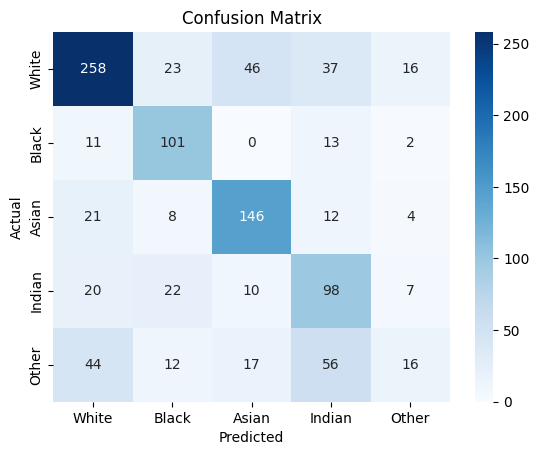

In [34]:
# --- Confusion Matrix ---
y_pred = np.argmax(best_model.predict(X_test), axis=1)
class_names = ['White','Black','Asian','Indian','Other']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step


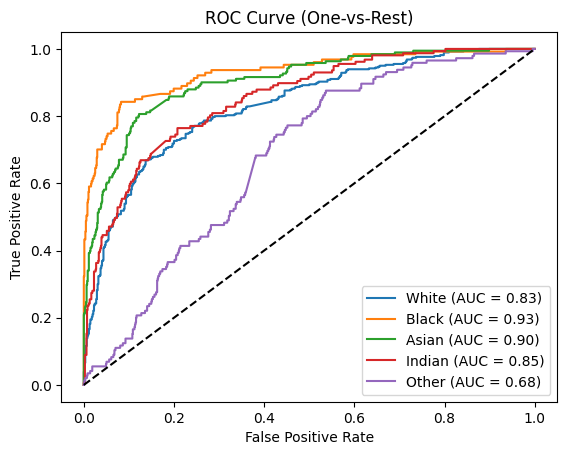

In [35]:
# --- ROC Curve (One-vs-Rest) ---
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
y_pred_prob = best_model.predict(X_test)

plt.figure()
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_pred_prob[:,i])
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc(fpr,tpr):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

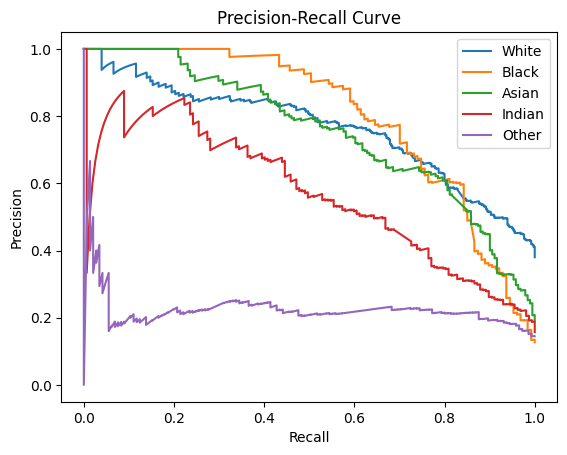

In [36]:
# --- Precision-Recall Curve (One-vs-Rest) ---
plt.figure()
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:,i], y_pred_prob[:,i])
    plt.plot(recall, precision, label=class_names[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [38]:
best_model.save('/content/drive/My Drive/Dl Models/CNN/best_race_model.h5')
print("Race classification model saved successfully!")

Race classification model saved successfully!
